In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('trainingOutput.csv',header=None)
data.columns = ["global_t", "thread_index", "scene_scope", "task_scope", "episode_reward", "episode_length", "episode_max_q"]
data.head()

,global_t,thread_index,scene_scope,task_scope,episode_reward,episode_length,episode_max_q
0,0,78,living_room_08,228,9.91,10,0.040915
1,530,40,bedroom_04,134,9.76,25,-0.000506
2,190,5,kitchen_02,90,9.73,28,-0.000109
3,1830,87,kitchen_02,157,9.77,24,0.009489
4,110,11,bathroom_02,37,9.63,38,-0.029825


In [17]:
sceneTimes = data.groupby(['scene_scope','global_t']).mean()['episode_length'].unstack().T
sceneTimes[:20]

scene_scope,bathroom_02,bedroom_04,kitchen_02,living_room_08
global_t,,,,
0,NaN,NaN,NaN,10.0
110,38.0,NaN,NaN,NaN
190,NaN,NaN,28.0,NaN
530,NaN,25.0,NaN,NaN
1830,NaN,NaN,24.0,NaN
3485,42.0,NaN,NaN,NaN
4787,NaN,NaN,NaN,73.0
5007,NaN,NaN,NaN,78.0
6500,98.0,NaN,NaN,NaN


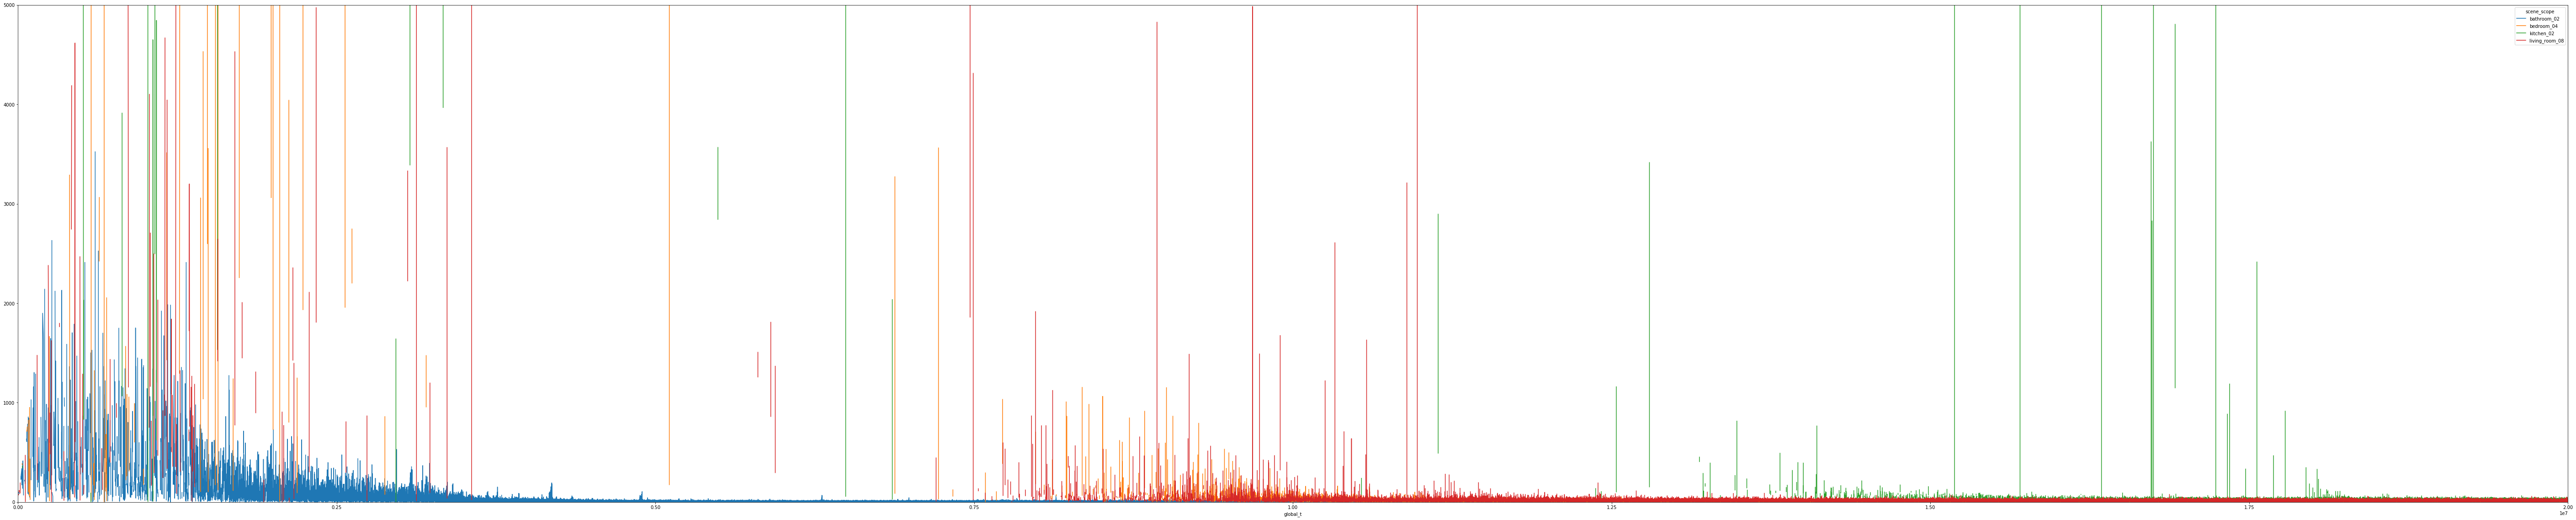

In [13]:
sceneTimes.plot(figsize=(100,20),ylim=(0,5000),xlim=(0,2e7))

In [12]:
# assign as variable because I'm going to use it more than once.
s = (sceneTimes.index.to_series() / 10).astype(int)

sceneTimes.groupby(s)

In [30]:
sceneTimes.index = pd.to_datetime(sceneTimes.index.astype(str),unit='s')

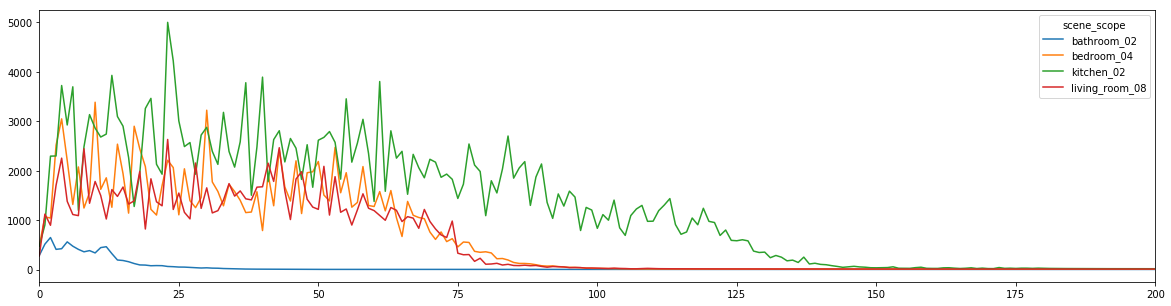

In [67]:
sceneTimes.resample('100000S').mean().reset_index().plot(figsize=(20,5),xlim=(0,200))#.resample('100000S').mean().fillna(5000)

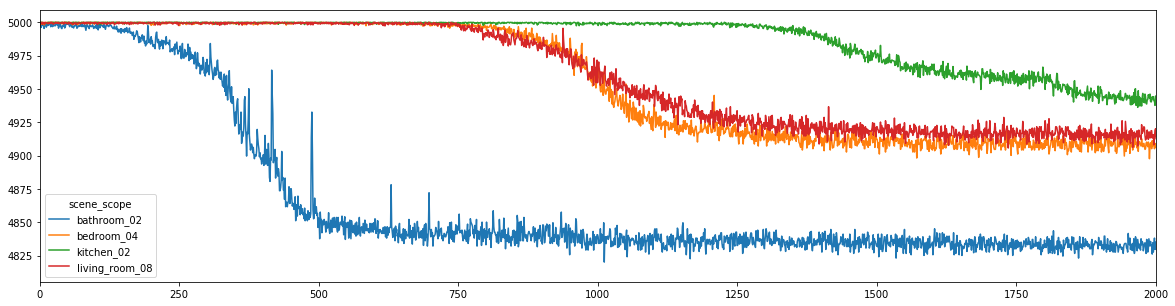

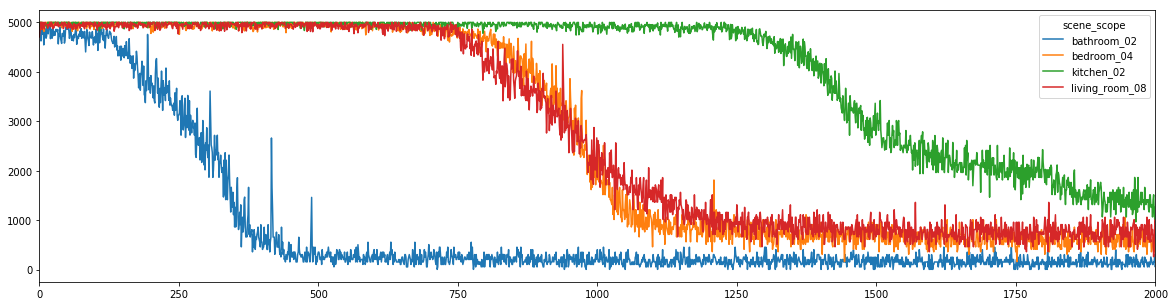

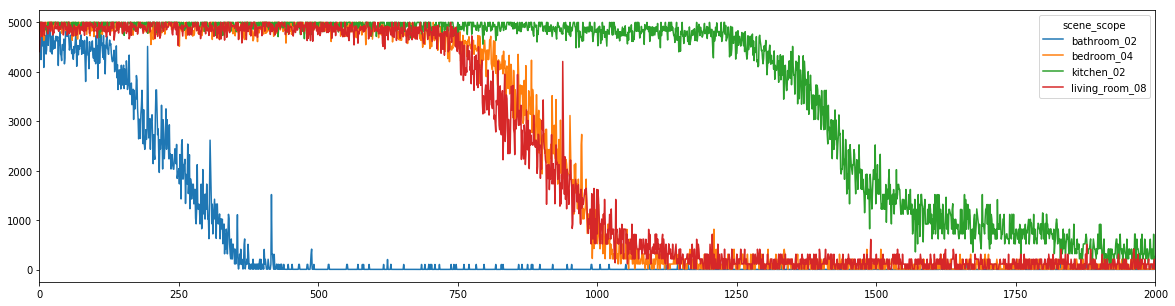

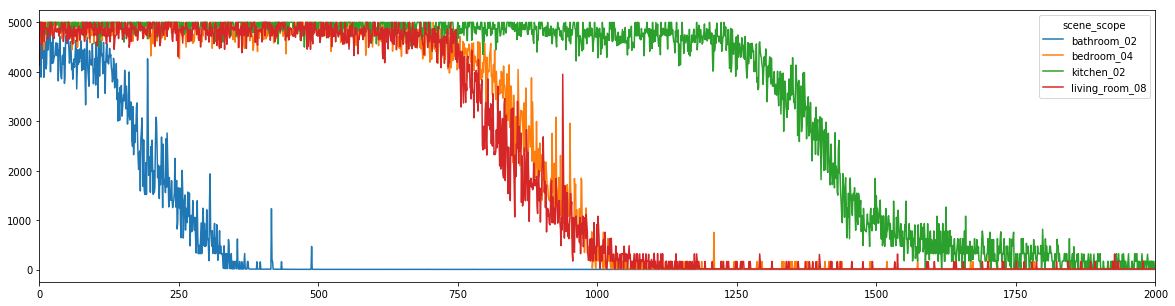

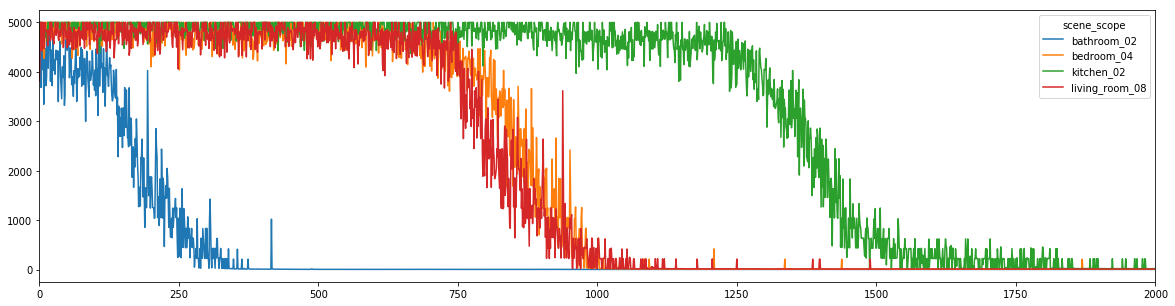

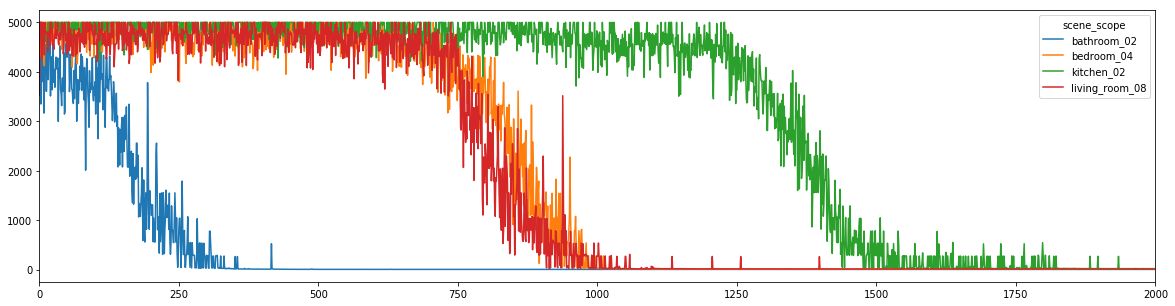

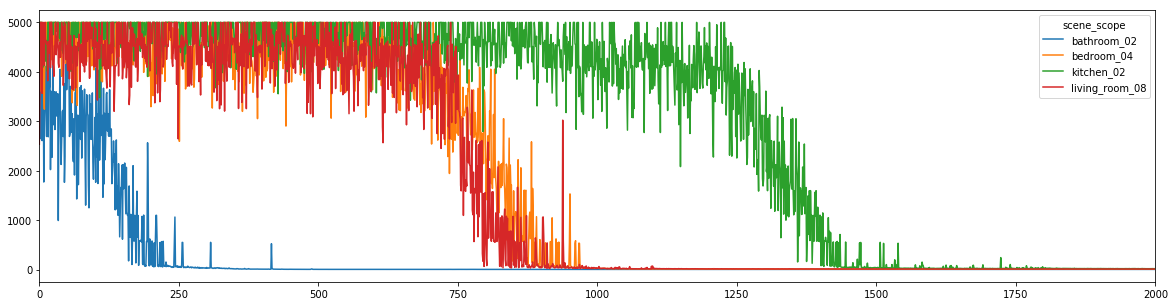

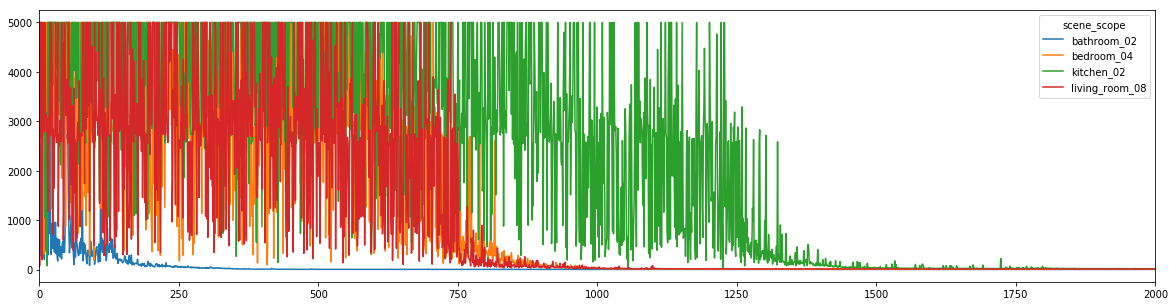

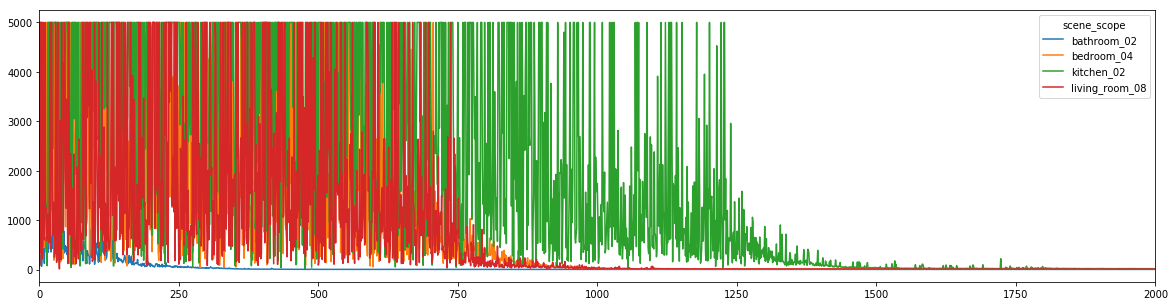

In [93]:
for i in [1,100,200,300,400,500,1000,5000,10000]:
    sceneTimes.resample(str(i)+'S').mean().fillna(5000).resample('10000S').mean().reset_index().plot(figsize=(20,5),xlim=(0,2000))#

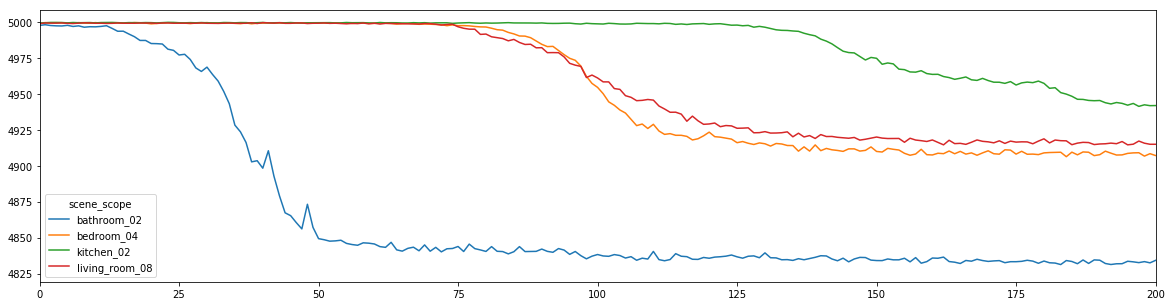

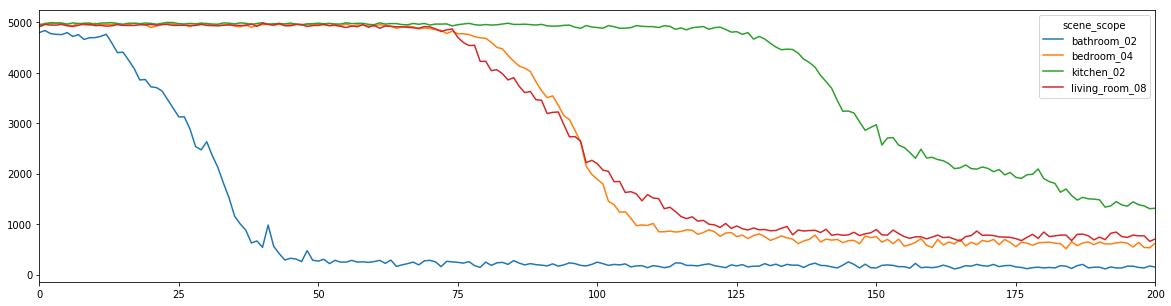

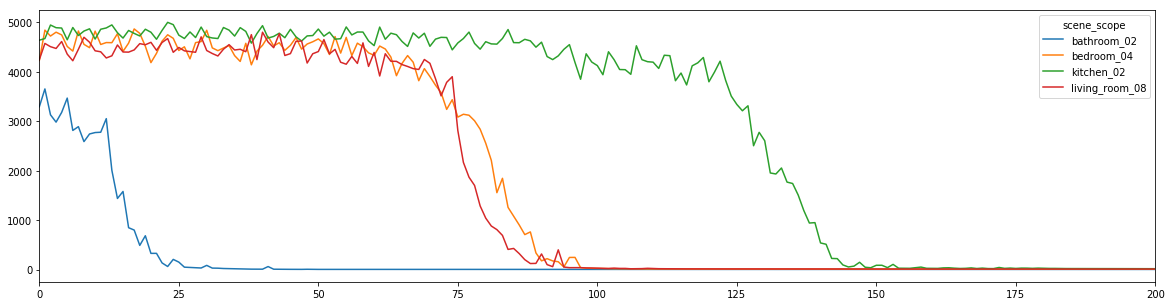

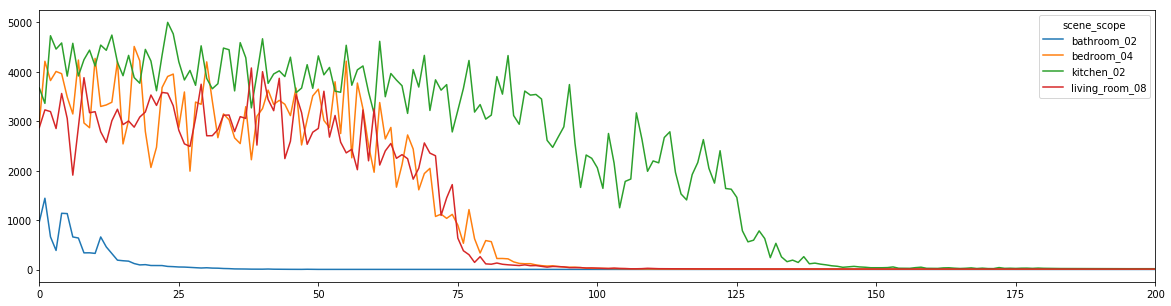

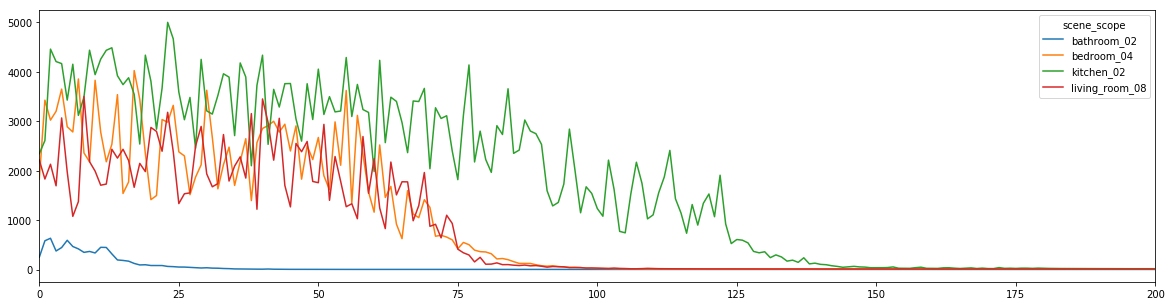

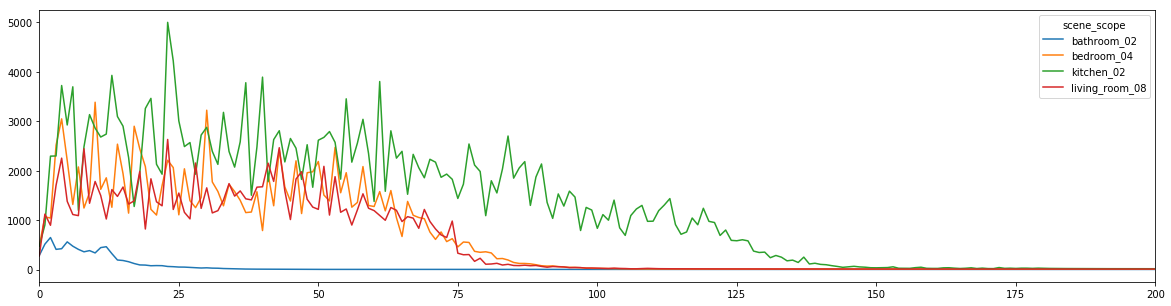

In [77]:
for i in [1,100,1000,5000,10000,100000]:
    sceneTimes.resample(str(i)+'S').mean().fillna(5000).resample('100000S').mean().reset_index().plot(figsize=(20,5),xlim=(0,200))#

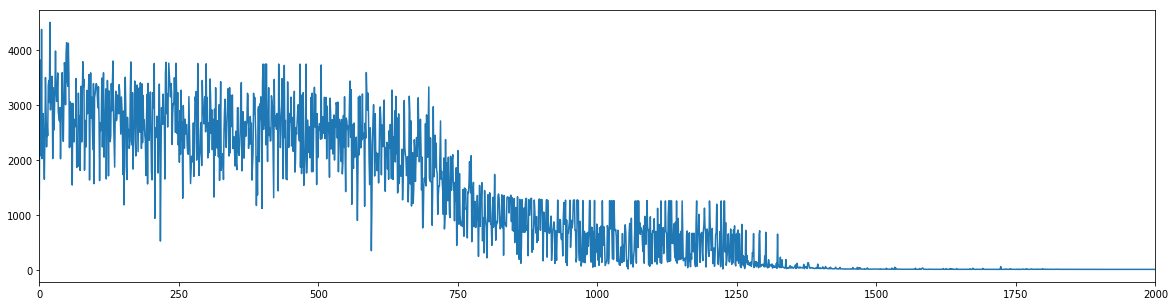

In [94]:
i=5000
sceneTimes.resample(str(i)+'S').mean().fillna(5000).resample('10000S').mean().reset_index().mean(axis=1).plot(figsize=(20,5),xlim=(0,2000))#

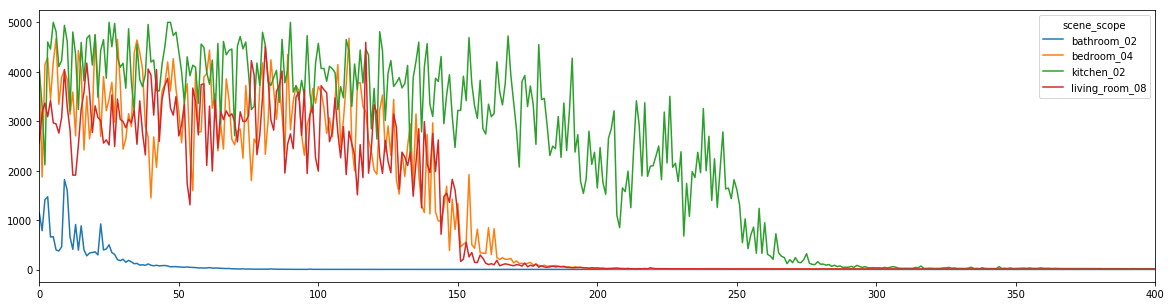

In [92]:
i=5000
sceneTimes.resample(str(i)+'S').mean().fillna(5000).resample('50000S').mean().reset_index().plot(figsize=(20,5),xlim=(0,400))#